# Merge all PVI datasets

Unfortunatley, data from 2002 on PVI is unavailable, so Data is limited to 2004-2021

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#df108 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_108.csv")

In [3]:
df109 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_109.csv")

In [4]:
df110 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_110.csv")

In [5]:
df111 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_111.csv")

In [6]:
df112 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_112.csv")

In [7]:
df113 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_113.csv")

In [8]:
df114 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_114.csv")

In [9]:
df115 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_115.csv")

In [10]:
df116 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_116.csv")

In [11]:
df117 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_117.csv")

In [12]:
df = pd.concat([df109,df110,df111,df112,df113,df114,df115,df116,df117])

In [13]:
df.metric.unique()

array([0.62, 0.63, 0.54, 0.66, 0.56, 0.75, 0.33, 0.64, 0.52, 0.59, 0.36,
       0.4 , 0.51, 0.49, 0.5 , 0.61, 0.57, 0.29, 0.31, 0.14, 0.12, 0.41,
       0.53, 0.28, 0.32, 0.34, 0.47, 0.6 , 0.45, 0.55, 0.37, 0.25, 0.38,
       0.3 , 0.2 , 0.27, 0.17, 0.39, 0.23, 0.58, 0.43, 0.42, 0.48, 0.46,
       0.69, 0.15, 0.21, 0.74, 0.68, 0.73, 0.19, 0.67, 0.7 , 0.22, 0.44,
       0.35, 0.18, 0.24, 0.16, 0.09, 0.1 , 0.07, 0.65, 0.11, 0.76, 0.72,
       0.79, 0.13, 0.71, 0.26, 0.78, 0.8 , 0.08, 0.81, 0.82, 0.77, 0.06,
       0.83, 0.84])

In [14]:
df
df["PVI"] = df["PVI"].str.replace("D+0","R+0")

## Analyze the Aggregated Data

In [15]:
import numpy as np
import plotnine as p9
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_smooth, coord_flip
from sklearn.linear_model import LinearRegression as lm
import warnings
warnings.filterwarnings('ignore')

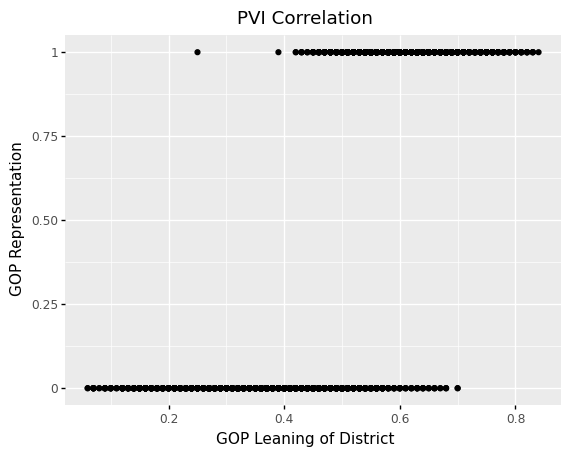

<ggplot: (8790258578929)>

In [16]:
# Create a super simple scatterplot to examine the relationship between PVI and congressional district
(p9.ggplot(data=df, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y='GOP Representation',color="",title="PVI Correlation"))

In [17]:
#group by metric and average GOP seats
bm = df.groupby('metric').mean()
#this will not be produced into a dataset without aggregating all years, as 
bm = bm.sort_values('metric')
bm = bm.reset_index()

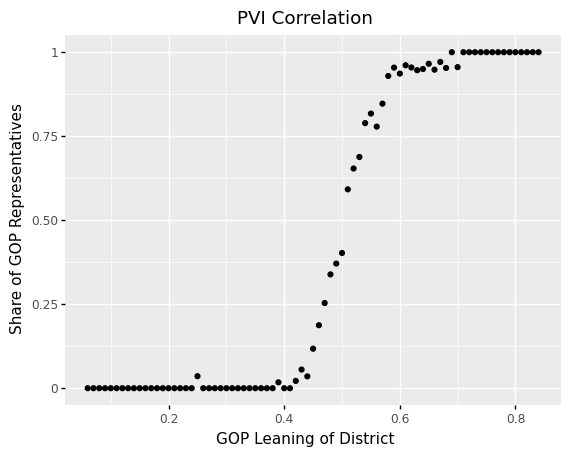

<ggplot: (8790258583595)>

In [18]:
#Plot averages
(p9.ggplot(data=bm, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation"))

In [19]:
#now lets limit the data to only the R+10 to D+10 range, calling it Limited Domain
ld = bm[bm["metric"] <= .6]
ld = ld[ld["metric"] >= .4]

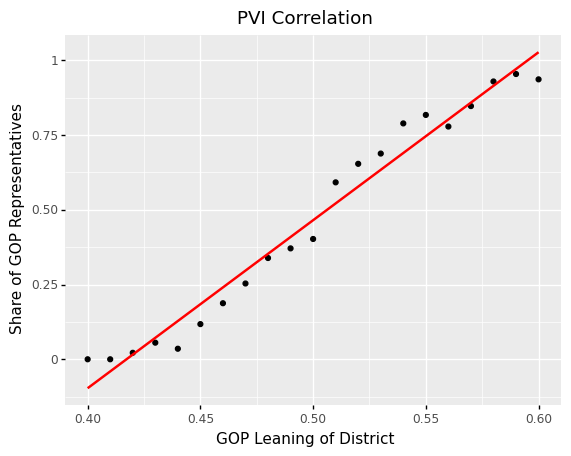

<ggplot: (8790248411519)>

In [20]:
#Plot averages
(p9.ggplot(data=ld, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + geom_smooth(method = "lm", color = "red", se = False)
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation"))

- 0 to .24 is solely Democratic
- .25 to .42 is less than 5% Republican
- .43 and .44 is less than 10% Republican
- .45 to .54 deserve their own bins
- .55 and .57 are more than 75% Republican
- .58 to .7 are more than 90% Republican
- .71 to 1 is solely Republican

In [21]:
binned = df
binned["bin"] = pd.cut(binned['metric'], 
    [0, .24, .42, .44, .45, .46, .47, .48, .49, .5,
    .51, .52, .53, .54, .57, .7, 1])
binned.bin = binned.bin.astype(str)
binned = binned.sort_values(by="metric")

In [22]:
#find a better way to create a dictionary here

In [23]:
#generate text for a dictionary for the replacement of the bins

dict_bin = pd.DataFrame(binned.bin.unique())
dict_bin["pvi"] = ["D+26+", "D+25 to D+8", "D+7 and D+6", "D+5", "D+4", "D+3", "D+2", "D+1", "EVEN", "R+1","R+2","R+3","R+4","R+5 to R+7","R+8 to R+20","R+21+"]
binned.bin = binned.bin.astype(str)
dict_bin[0] = dict_bin[0].astype(str)
dict_bin = dict_bin.rename(columns = {0:"bin","pvi":"range"})
dict_col = "'" + dict_bin.bin + "'" + " " + ":" + " " + "'" + dict_bin.range + "'" + ","
#dict_col

In [24]:
bin_dict = {
'(0.0, 0.24]' : 'D+26+',
'(0.24, 0.42]' : 'D+25 to D+8',
'(0.42, 0.44]' : 'D+7 to D+6',
'(0.44, 0.45]' : 'D+5',
'(0.45, 0.46]' : 'D+4',
'(0.46, 0.47]' : 'D+3',
'(0.47, 0.48]' : 'D+2',
'(0.48, 0.49]' : 'D+1',
'(0.49, 0.5]' : 'EVEN',
'(0.5, 0.51]' : 'R+1',
'(0.51, 0.52]' : 'R+2',
'(0.52, 0.53]' : 'R+3',
'(0.53, 0.54]' : 'R+4',
'(0.54, 0.57]' : 'R+5 to R+7',
'(0.57, 0.7]' : 'R+8 to R+20',
'(0.7, 1.0]' : 'R+21+',
}

In [25]:
df = binned.replace({"bin":bin_dict})

In [26]:
#group by metric and average GOP seats
sort = df.groupby('bin').mean()
sort = sort.sort_values(by="metric")
#this will not be produced into a dataset without aggregating all years, as 
sort = sort.reset_index()
sort

,bin,year,congress,is_GOP,metric
0,D+26+,2012.487654,113.243827,0.000000,0.176296
1,D+25 to D+8,2012.075640,113.037820,0.004449,0.351780
2,D+7 to D+6,2012.280255,113.140127,0.044586,0.435414
3,D+5,2011.600000,112.800000,0.117647,0.450000
4,D+4,2011.625000,112.812500,0.187500,0.460000
5,D+3,2011.070423,112.535211,0.253521,0.470000
6,D+2,2010.419355,112.209677,0.338710,0.480000
7,D+1,2012.000000,113.000000,0.370968,0.490000
8,EVEN,2011.073171,112.536585,0.402439,0.500000
9,R+1,2010.959184,112.479592,0.591837,0.510000


In [27]:
sort["bin"] = pd.Categorical(sort["bin"], ["D+26+","D+25 to D+8","D+7 to D+6","D+5","D+4","D+3","D+2","D+1",
                                          "EVEN","R+1","R+2","R+3","R+4","R+5 to R+7","R+8 to R+20","R+21+"])
sort = sort.sort_values("bin")

In [28]:
sort

,bin,year,congress,is_GOP,metric
0,D+26+,2012.487654,113.243827,0.000000,0.176296
1,D+25 to D+8,2012.075640,113.037820,0.004449,0.351780
2,D+7 to D+6,2012.280255,113.140127,0.044586,0.435414
3,D+5,2011.600000,112.800000,0.117647,0.450000
4,D+4,2011.625000,112.812500,0.187500,0.460000
5,D+3,2011.070423,112.535211,0.253521,0.470000
6,D+2,2010.419355,112.209677,0.338710,0.480000
7,D+1,2012.000000,113.000000,0.370968,0.490000
8,EVEN,2011.073171,112.536585,0.402439,0.500000
9,R+1,2010.959184,112.479592,0.591837,0.510000


In [29]:
#import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(sort.bin,sort.is_GOP)
#plt.show()

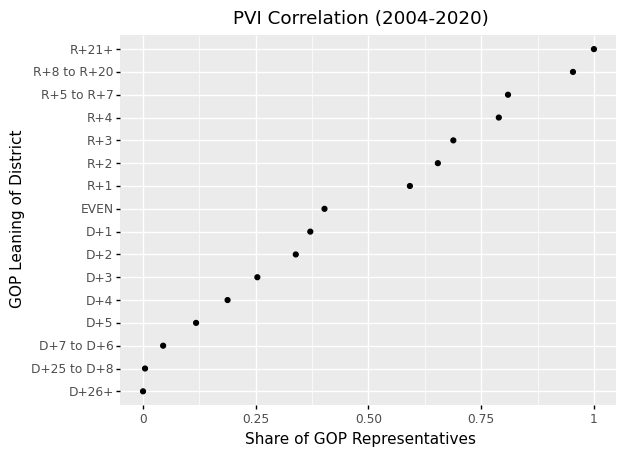

<ggplot: (8790249605663)>

In [30]:
#Plot averages
(p9.ggplot(data=sort, mapping=p9.aes(x='bin', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation (2004-2020)")) + coord_flip()

At this point you may be asking, "why the hell is he binning like that? you'd think it would at least be symmetrical?

The answer lies in the practicality of the data; a D+25 District is somehow more likely to produces a Republican than a D+9? Groupings were designed by somewhat arbitrary standatds that sought to erase outlies without corrupting the general trends of the data to insure linearity in preditions

## Output a Dictionaries

In [31]:
#create a dataframe where the metric corresponds to the PVI bin
metric_bin = df.groupby('metric').head(1)
full_dict = metric_bin[['metric','bin','PVI']]
metric_bin_ind = metric_bin[['metric','bin']]
metric_bin_dict = metric_bin_ind.set_index('metric').to_dict()
mbd = metric_bin_dict["bin"]
#mbd is a dictionary that converts the metric value to the bin name

In [32]:
#create a dataframe where the metric corresponds to the PVI bin
metric_prob = sort[['bin','is_GOP']]
metric_prob_ind = metric_prob[['bin','is_GOP']]
metric_prob_dict = metric_prob_ind.set_index('bin').to_dict()
mpd = metric_prob_dict["is_GOP"]
#mpd is a dictionary that converts the bin name to probability of a GOP representative

In [33]:
#create the conversion chart
conv = sort[["bin","is_GOP"]]
conv = conv.rename(columns = {"is_GOP":"prob_GOP"})

## Call in and Manipulate the 118th Data

In [34]:
#load in pre-cleaned dataset
data_118 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_118.csv")
#modify later to retrieve a live version of the link

In [35]:
#load in pre-cleaned state dataset
state_118 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/state_pvi/state_118.csv")

In [36]:
#apply dictionaries
data_118["bin"] =  data_118["metric"]
data_118 = data_118.replace({"bin": mbd})
data_118["prob_GOP"] =  data_118["bin"]
data_118 = data_118.replace({"prob_GOP": mpd})
data_118.head()

,year,congress,ST,ST#,PVI,metric,bin,prob_GOP
0,2022,118,AL,AL1,R+32,0.66,R+8 to R+20,0.953509
1,2022,118,AL,AL2,R+34,0.67,R+8 to R+20,0.953509
2,2022,118,AL,AL3,R+39,0.70,R+8 to R+20,0.953509
3,2022,118,AL,AL4,R+65,0.82,R+21+,1.000000
4,2022,118,AL,AL5,R+32,0.66,R+8 to R+20,0.953509


## Create a Function

In [365]:
#load in pre-cleaned state dataset
state_118 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/state_pvi/state_118.csv")

In [366]:
state_118["dist_loss"] = 0
state_118["porp_loss"] = 0
state_118.head()

,year,ST,PVI,metric,dist_loss,porp_loss
0,2020,AL,R+15,0.65,0,0
1,2020,AK,R+9,0.59,0,0
2,2020,AZ,R+3,0.53,0,0
3,2020,AR,R+16,0.66,0,0
4,2020,CA,D+14,0.36,0,0


In [367]:
#test run with Arizona
ST = "AZ"
st = data_118[data_118["ST"] == ST]
st_avg = st.prob_GOP.mean()
num_dist = len(st)
act_num = st_avg * num_dist
st_lean = state_118["metric"][state_118["ST"] == str(ST)]
best_num = st_lean * num_dist
diff_dist = (best_num-act_num)
diff_pop = (diff_dist / num_dist)
#print(diff_dist, diff_pop)
state_118.dist_loss[state_118["ST"] == ST] = diff_dist
state_118.porp_loss[state_118["ST"] == ST] = diff_pop
state_118.head()

#all clear

,year,ST,PVI,metric,dist_loss,porp_loss
0,2020,AL,R+15,0.65,0.000000,0.000000
1,2020,AK,R+9,0.59,0.000000,0.000000
2,2020,AZ,R+3,0.53,-0.901064,-0.100118
3,2020,AR,R+16,0.66,0.000000,0.000000
4,2020,CA,D+14,0.36,0.000000,0.000000


In [364]:
def fairness(ST):
    st = data_118[data_118["ST"] == ST]
    st_avg = st.prob_GOP.mean()
    num_dist = len(st)
    act_num = st_avg * num_dist
    st_lean = state_118["metric"][state_118["ST"] == str(ST)]
    best_num = st_lean * num_dist
    diff_dist = (best_num-act_num)
    diff_pop = (diff_dist / num_dist)
    #print(diff_dist, diff_pop)
    state_118.dist_loss[state_118["ST"] == ST] = diff_dist
    state_118.porp_loss[state_118["ST"] == ST] = diff_pop

fairness("CA")

In [281]:
state_118.district_loss = 0
state_118

,year,ST,PVI,metric
0,2020,AL,R+15,0.65
1,2020,AK,R+9,0.59
2,2020,AZ,R+3,0.53
3,2020,AR,R+16,0.66
4,2020,CA,D+14,0.36
5,2020,CO,D+3,0.47
6,2020,CT,D+7,0.43
7,2020,DE,D+6,0.44
8,2020,FL,R+3,0.53
9,2020,GA,R+3,0.53


In [260]:
def fair_dist(ST):
    st = data_118[data_118["ST"] == ST]
    st_avg = st.prob_GOP.mean()
    num_dist = len(st)
    act_num = st_avg * num_dist
    st_metric = state_118["metric"][state_118["ST"] == ST][0]
    st_lean = st_metric
    best_num = st_lean * num_dist
    diff_dist = (best_num-act_num)
    print(diff_dist)

def fair_porp(ST):
    st = data_118[data_118["ST"] == ST]
    st_avg = st.prob_GOP.mean()
    num_dist = len(st)
    act_num = st_avg * num_dist
    st_metric = state_118["metric"][state_118["ST"] == ST][0]
    st_lean = st_metric
    best_num = st_lean * num_dist
    diff_dist = (best_num-act_num)
    diff_porp = (diff_dist / num_dist)
    print(diff_porp)

In [264]:
fair_dist("AL")

-1.2219932478582436


In [278]:
states = state_118.ST.unique().tolist()
type(states)
STs = pd.DataFrame(states, columns=["ST"])
STs.ST = '"' + STs.ST + '"'

ValueError: Can only compare identically-labeled Series objects

In [232]:
[fair_dist(ST) for ST in state_118.ST]

KeyError: 0

In [74]:
state_118.porp_loss = state_118.ST.apply(fair)

TypeError: 'int' object does not support item assignment

NameError: name 'state118' is not defined